# Assignment 1 - Part 2

Mount notebook to drive

In [202]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Save raw data into .csv file and create dataframe

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

project_path = '/content/drive/MyDrive/DataScience-Assignment1/Part2_Visualization'

# sp: student performance
sp_df = pd.read_csv(project_path + '/data_raw/StudentsPerformance.csv')

## Data Preprocessing

Inspecting the structure of the data

In [204]:
sp_df.head()

# Check for missing/null values
sp_df.info()

# Check if any scores (math, reading, writing) are not in range 0-100
sp_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


*   From info() we can see that there are no null values
*   From describe() we can see that the scores are in the range 0-100 by looking at the min and max



In [205]:
# Rename columns to consistent lowercase format for readability and consistency
sp_df.rename(columns={'race/ethnicity': 'race_ethnicity',
                      'parental level of education': 'parental_education',
                      'test preparation course': 'test_prep',
                      'math score': 'math_score',
                      'reading score': 'reading_score',
                      'writing score': 'writing_score'}, inplace=True)
sp_df.head()

,gender,race_ethnicity,parental_education,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Save clean data into data_processed folder

In [206]:
sp_df.to_csv(project_path + '/data_processed/students_performance_clean.csv', index=False)

# Read cleaned data into new dataframe for visualizations
df = pd.read_csv(project_path + '/data_processed/students_performance_clean.csv')

## V1 - Gender boxplots (math vs reading)


*   Question: Are there gender differences in math vs reading?
*   Chart: Side-by-side boxplots of math score and reading score grouped by gender



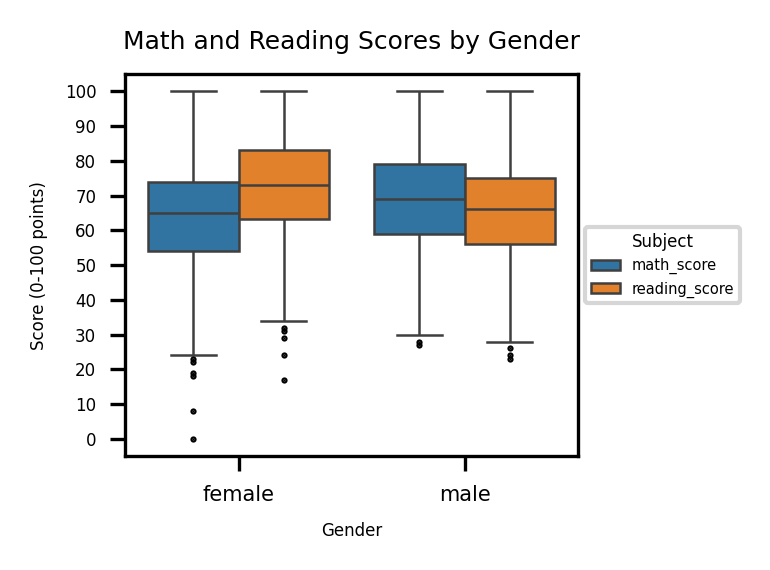

In [218]:
# Reshape dataframe into a "long" format so each row contains gender, subject (math or reading), and score
df1 = df.melt(
    id_vars=['gender'],
    value_vars=['math_score', 'reading_score'],
    var_name='subject',
    value_name='score'
)

# Create the figure with the given size
plt.figure(figsize=(800/300, 600/300), dpi=300)

# Create the boxplot
figure1 = sns.boxplot(
    data=df1,
    x='gender',
    y='score',
    hue='subject',
    linewidth=0.6,
    flierprops={
        'marker': 'o',
        'markerfacecolor': 'black',
        'markeredgecolor': 'black',
        'markersize': 0.5
    }
)

# Labels
plt.title("Math and Reading Scores by Gender", fontsize=6)
plt.xlabel("Gender", fontsize=4)
plt.ylabel("Score (0-100 points)", fontsize=4)

# Ticks and legend
plt.xticks(fontsize=5)
plt.yticks(fontsize=4)
plt.yticks(np.arange(0, 101, 10))
plt.legend(title="Subject",
           fontsize=3.5,
           title_fontsize=4,
           loc="center left",
           bbox_to_anchor=(1, 0.5),
           )
plt.tight_layout()
plt.show()

# save figure to figures folder
figure1.get_figure().savefig(project_path + '/figures/v1_gender_boxplots.png')

## V2 - Test Prep Impact on Math


*   Question: Do students who completed test prep score higher in math?
*   Chart: Boxplot for math_score by test_prep




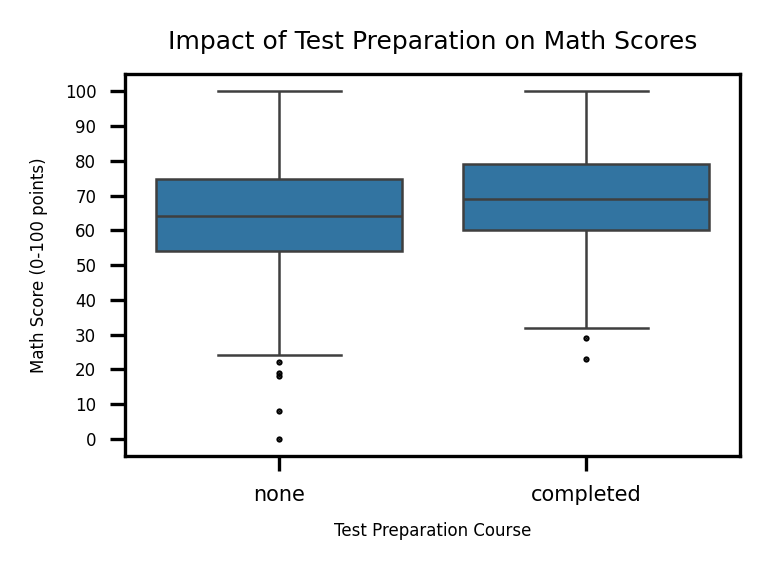

In [219]:
plt.figure(figsize=(800/300, 600/300), dpi=300)
# Create boxplot
figure2 = sns.boxplot(
    data=df,
    x='test_prep',
    y='math_score',
    linewidth=0.6,
    flierprops={
        'marker': 'o',
        'markerfacecolor': 'black',
        'markeredgecolor': 'black',
        'markersize': 0.5
    }
)

# Labels
plt.title("Impact of Test Preparation on Math Scores", fontsize=6)
plt.xlabel("Test Preparation Course", fontsize=4)
plt.ylabel("Math Score (0-100 points)", fontsize=4)

# Ticks and other
plt.xticks(fontsize=5)
plt.yticks(fontsize=4)
plt.yticks(np.arange(0, 101, 10))
plt.tight_layout()
plt.show()

# save figure to figures folder
figure2.get_figure().savefig(project_path + '/figures/v2_test_prep_impact.png')

## V3- Lunch type and average performance


*   Question: Does lunch type (standard vs free/reduced) relate to outcomes?
*   Chart: Grouped bar chart of mean overall_avg of all the scores (math, reading, writing) by lunch



/tmp/ipython-input-734/1566046558.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  figure3 = sns.barplot(


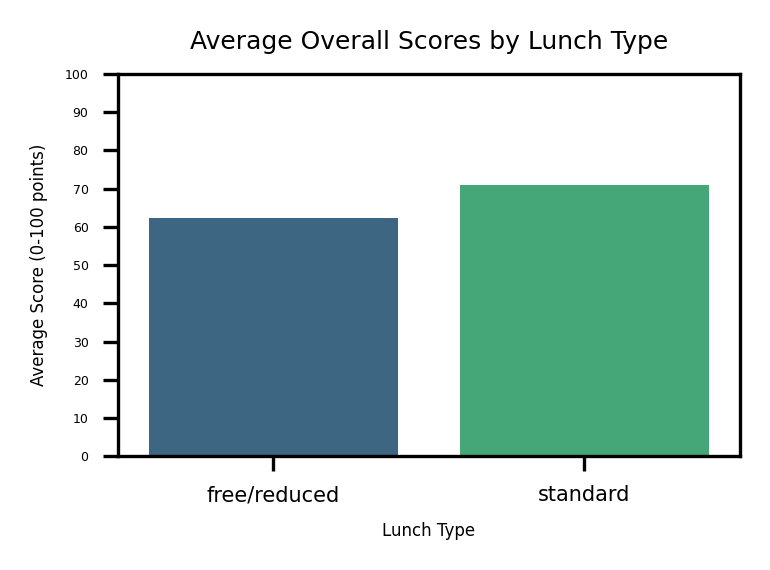

In [229]:
# Calculate the overall average mean for all scores for each student and add column
df3 = df.copy()
df3['overall_avg'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

# Group by lunch and take mean
group_means = df3.groupby('lunch')['overall_avg'].mean()

# Create bar graph
plt.figure(figsize=(800/300, 600/300), dpi=300)

figure3 = sns.barplot(
    data=group_means.reset_index(),
    x='lunch',
    y='overall_avg',
    palette='viridis'
)

# Labels and other
plt.title("Average Overall Scores by Lunch Type", fontsize=6)
plt.xlabel("Lunch Type", fontsize=4)
plt.ylabel("Average Score (0-100 points)", fontsize=4)

plt.xticks(fontsize=5)
plt.yticks(fontsize=3)
plt.ylim(0, 100)
plt.yticks(np.arange(0, 101, 10))
plt.tight_layout()
plt.show()

# save figure to figures folder
figure3.get_figure().savefig(project_path + '/figures/v3_lunch_type_performance.png')

## V4 - Subject Correlations


*   Question: How strongly do the three subjects move together?
*   Chart: Correlation heatmap for math, reading, writing with annotated coefficients.



In [210]:
# Create correlation matrix for the scores
df4_correlation_matrix = df[['math_score', 'reading_score', 'writing_score']].corr().round(4)
df4_correlation_matrix

,math_score,reading_score,writing_score
math_score,1.0000,0.8176,0.8026
reading_score,0.8176,1.0000,0.9546
writing_score,0.8026,0.9546,1.0000


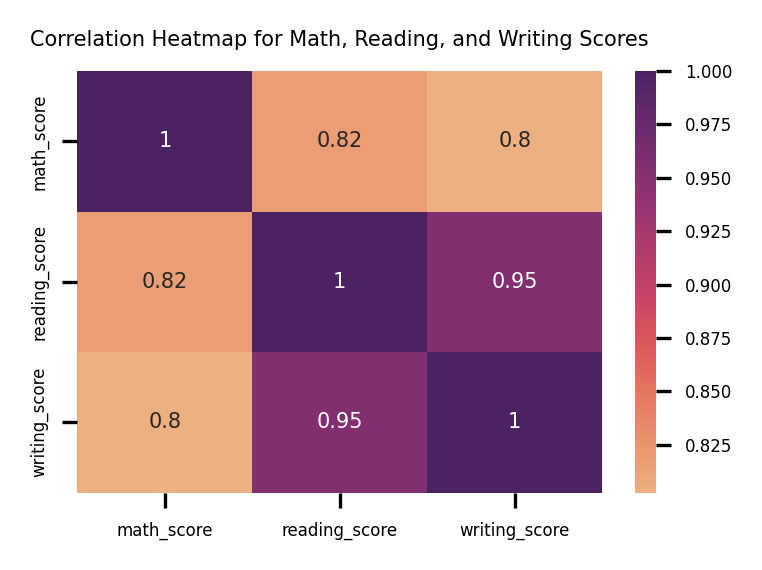

In [226]:
plt.figure(figsize=(800/300, 600/300), dpi=300)

# Create heatmap
figure4 = sns.heatmap(
    data=df4_correlation_matrix,
    annot=True,
    cmap='flare',
    annot_kws={'fontsize': 5},
    cbar={'label': 'Correlation Coefficient'}
)

# Labels and other
figure4.collections[0].colorbar.ax.tick_params(labelsize=4)
plt.title("Correlation Heatmap for Math, Reading, and Writing Scores", fontsize=5)
plt.xticks(rotation=0,fontsize=4)
plt.yticks(rotation=90,fontsize=4)
plt.tight_layout()
plt.show()

# save figure to figures folder
figure4.get_figure().savefig(project_path + '/figures/v4_subject_correlations.png')

## V5 - Math vs Reading with trend lines by test prep


*   Question: How strongly are math and reading scores associated, and do students who completed the test‑preparation course have a different slope in the math–reading relationship than those who did not?
*   Chart: Scatter plot with two straight best‑fit lines (one for each group: completed, none).
i. X‑axis: reading score
ii. Y‑axis: math score
*   Color: Points colored by test preparation course (legend must show the twogroups and each group’s n).




In [212]:
# Get test prep counts for legend
test_prep_counts = df['test_prep'].value_counts()

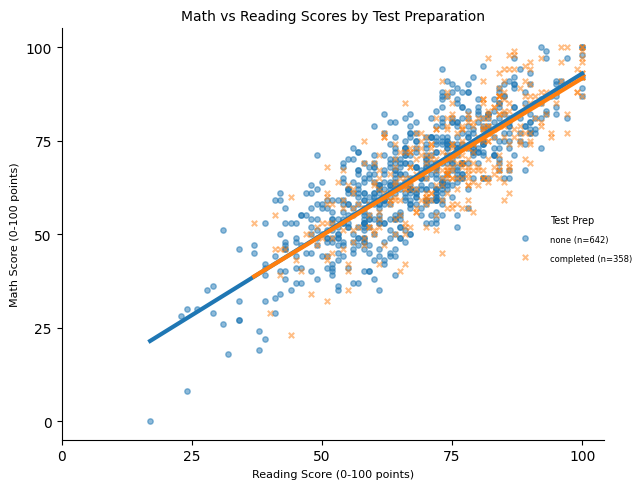

In [228]:
# Create lmplot (groups and regression lines)
figure5 = sns.lmplot(
    data=df,
    x='reading_score',
    y='math_score',
    hue='test_prep',
    # height=600/300,
    # aspect=800/600,
    markers=['o', 'x'],
    scatter_kws={'s': 15, 'alpha':0.5},
    ci=None,
    line_kws={'linewidth': 3},
)

# Labels
plt.title("Math vs Reading Scores by Test Preparation", fontsize=10)
figure5.set_axis_labels("Reading Score (0-100 points)", "Math Score (0-100 points)", fontsize=8)
figure5.set(xticks=np.arange(0, 101, 25))
figure5.set(yticks=np.arange(0, 101, 25))

# Move the legend outside
legend = figure5._legend
legend.set_bbox_to_anchor((0.8, 0.5))
legend.set_loc("center left")

# Change legend title and font sizes
legend.set_title("Test Prep")
legend.get_title().set_fontsize(7)
for text in legend.get_texts():
    text.set_fontsize(6)
    group_name = text.get_text()
    n = len(df[df['test_prep'] == group_name])
    text.set_text(f"{group_name} (n={n})")

plt.tight_layout()
plt.show()

# save figure to figures folder
figure5.savefig(project_path + '/figures/v5_math_vs_reading.png')